## Clustering With K Means - My solution

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [21]:
# Convert arrays to a dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
df.drop(['sepal length (cm)', 'sepal width (cm)'],axis='columns', inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0, 0.5, 'Width')

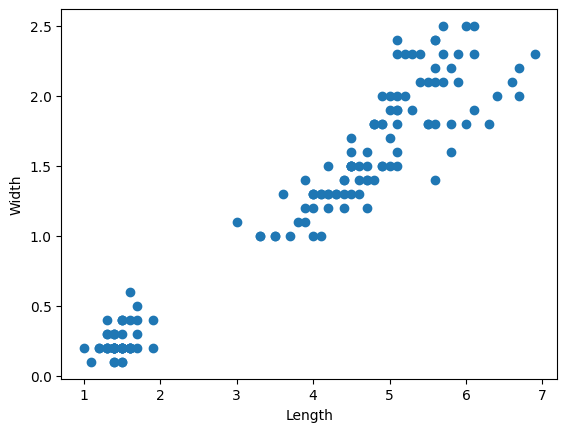

In [24]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.xlabel('Length')
plt.ylabel('Width')

In [28]:
# Clustering without scaling
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [29]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [30]:
km.cluster_centers_

array([[4.29259259, 1.35925926],
       [1.462     , 0.246     ],
       [5.62608696, 2.04782609]])

In [31]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

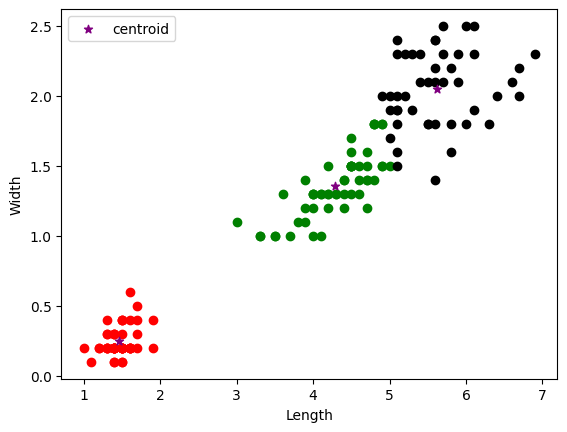

In [32]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()

### 2.preprocessing(scaling) is not necessary

### 3. Elbow plot

In [33]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

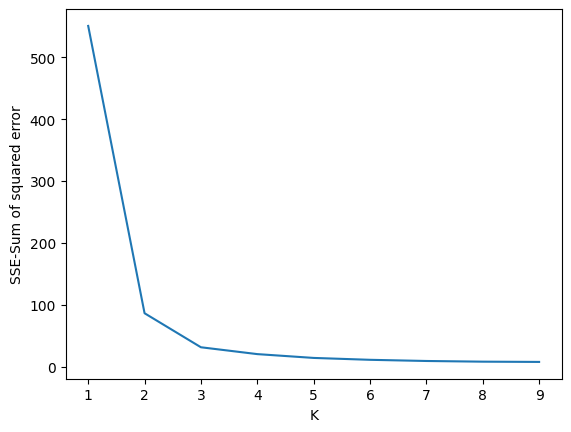

In [34]:
plt.xlabel('K')
plt.ylabel('SSE-Sum of squared error')
plt.plot(k_rng,sse)

Optimal values is K=3